In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV

df = pd.read_csv("mnist.csv")
X = df.drop(columns=["class"]).to_numpy()
Y = df["class"].to_numpy()

# no hay que normalizar
# no hay que codificar
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, stratify=Y)

In [ ]:
from sklearn.svm import LinearSVC

svc = LinearSVC()
params = {
    "C": (1, 2, 10),
    "max_iter": (100,)
}
svm_linear_cv = GridSearchCV(svc, params, cv=3)
svm_linear_cv.fit(X_train, Y_train)
svm_linear_cv.cv_results_

In [ ]:
from joblib import dump

final_svc = LinearSVC(C=1, max_iter=1000)
final_svc.fit(X, Y)
dump(final_svc, "svm_linear.joblib")

In [20]:
import tensorflow as tf
from tensorflow.keras.layers.experimental import preprocessing

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer([28, 28, 1]),
    # Preprocessing
    preprocessing.RandomRotation(factor=0.2),
    preprocessing.RandomTranslation(height_factor=0.2, width_factor=0.2),
    preprocessing.RandomZoom(height_factor=0.5, width_factor=0.5),
    # Base
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="SAME"),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    # Head
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [21]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_rotation_2 (RandomRot (None, 28, 28, 1)         0         
_________________________________________________________________
random_translation_2 (Random (None, 28, 28, 1)         0         
_________________________________________________________________
random_zoom_2 (RandomZoom)   (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12544)            

In [23]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True
)

In [24]:
X_train_images = np.array([image.reshape(28, 28, 1) for image in X_train])
X_test_images = np.array([image.reshape(28, 28, 1) for image in X_test])

In [25]:
history = model.fit(
    X_train_images,
    Y_train,
    validation_data=(X_test_images, Y_test),
    epochs=10,
    batch_size=25,
    callbacks=[early_stopping]
)

Epoch 1/10
1662/1662 [==============================] - 176s 105ms/step - loss: 1.4808 - accuracy: 0.5131 - val_loss: 1.0107 - val_accuracy: 0.7468
Epoch 2/10
1662/1662 [==============================] - 185s 112ms/step - loss: 0.9406 - accuracy: 0.6890 - val_loss: 0.5772 - val_accuracy: 0.8537
Epoch 3/10
1662/1662 [==============================] - 174s 105ms/step - loss: 0.8136 - accuracy: 0.7373 - val_loss: 0.5669 - val_accuracy: 0.8621
Epoch 4/10
1662/1662 [==============================] - 186s 112ms/step - loss: 0.7408 - accuracy: 0.7599 - val_loss: 0.8197 - val_accuracy: 0.8206
Epoch 5/10
1662/1662 [==============================] - 190s 114ms/step - loss: 0.6960 - accuracy: 0.7741 - val_loss: 0.3842 - val_accuracy: 0.9014
Epoch 6/10
1662/1662 [==============================] - 185s 112ms/step - loss: 0.6592 - accuracy: 0.7895 - val_loss: 0.8047 - val_accuracy: 0.8346
Epoch 7/10
1662/1662 [==============================] - 179s 107ms/step - loss: 0.6395 - accuracy: 0.7946 - val_

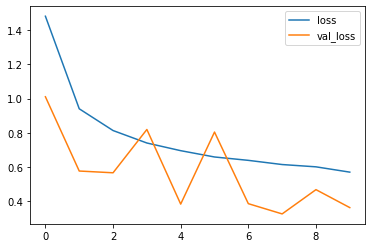

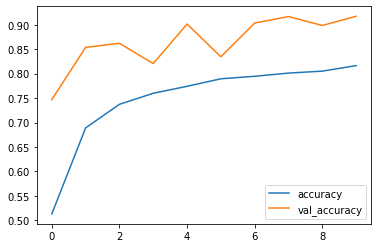

In [26]:
import pandas as pd

history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

In [27]:
model.save("keras.h5")

In [2]:
import tensorflow as tf

model = tf.keras.models.load_model("keras.h5")

In [10]:
q = model.predict(np.array([X_train_images[0],]))[0]
np.argmax(q)

4

Help on class RandomCrop in module tensorflow.python.keras.layers.preprocessing.image_preprocessing:

class RandomCrop(tensorflow.python.keras.engine.base_preprocessing_layer.PreprocessingLayer)
 |  RandomCrop(*args, **kwargs)
 |  
 |  Randomly crop the images to target height and width.
 |  
 |  This layer will crop all the images in the same batch to the same cropping
 |  location.
 |  By default, random cropping is only applied during training. At inference
 |  time, the images will be first rescaled to preserve the shorter side, and
 |  center cropped. If you need to apply random cropping at inference time,
 |  set `training` to True when calling the layer.
 |  
 |  Input shape:
 |    4D tensor with shape:
 |    `(samples, height, width, channels)`, data_format='channels_last'.
 |  
 |  Output shape:
 |    4D tensor with shape:
 |    `(samples, target_height, target_width, channels)`.
 |  
 |  Args:
 |    height: Integer, the height of the output shape.
 |    width: Integer, the wi